Zípf_law

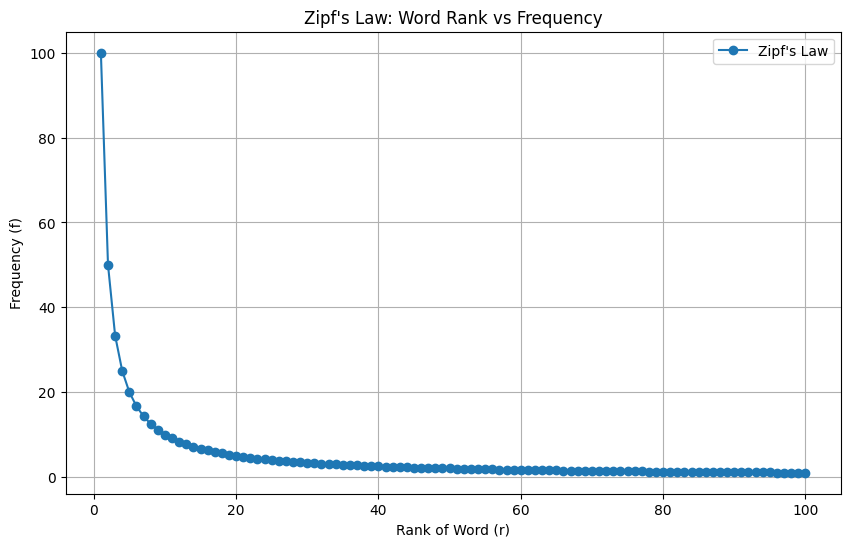

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Giả lập tần suất từ theo Zipf's Law
def zipf_law(rank, constant=100):
    return constant / rank

# Số lượng từ và hạng của chúng
num_words = 100
ranks = np.arange(1, num_words + 1)  # Hạng từ 1 đến num_words
frequencies = zipf_law(ranks)

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(ranks, frequencies, marker='o', linestyle='-', label="Zipf's Law")
plt.xlabel("Rank of Word (r)")
plt.ylabel("Frequency (f)")
plt.title("Zipf's Law: Word Rank vs Frequency")
plt.grid()
plt.legend()
plt.show()


Heaps_law

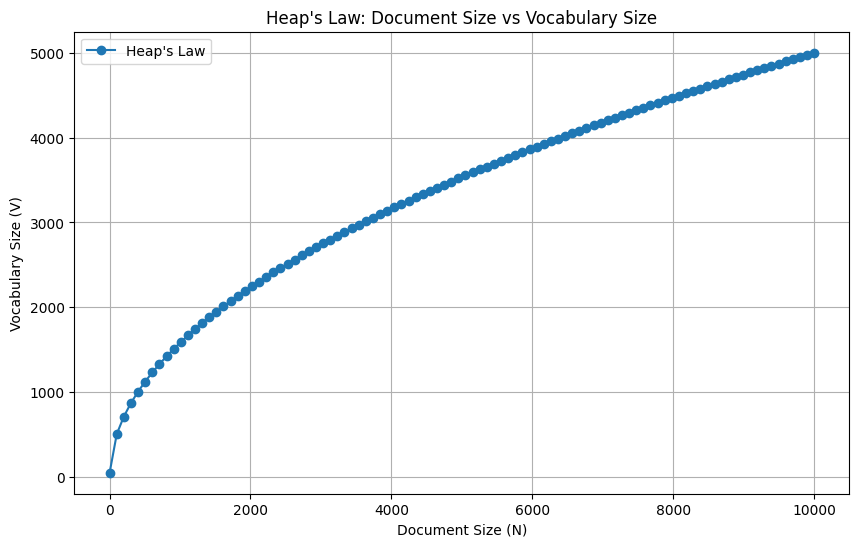

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Giả lập kích thước từ vựng theo Heap's Law
def heaps_law(document_size, K=50, beta=0.5):
    return K * (document_size ** beta)

# Kích thước tập tài liệu (N) và tính toán kích thước từ vựng (V)
document_sizes = np.linspace(1, 10000, 100)  # Số từ từ 1 đến 10,000
vocabulary_sizes = heaps_law(document_sizes)

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(document_sizes, vocabulary_sizes, marker='o', linestyle='-', label="Heap's Law")
plt.xlabel("Document Size (N)")
plt.ylabel("Vocabulary Size (V)")
plt.title("Heap's Law: Document Size vs Vocabulary Size")
plt.grid()
plt.legend()
plt.show()


In [3]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import re
from sklearn.linear_model import LinearRegression
# Function to clean and tokenize text
def preprocess_text(text):
    # Loại bỏ dấu câu và chuyển chữ thường
    text = re.sub(r'[^\w\s]', '', text).lower()
    # Tách từ
    tokens = text.split()
    return tokens

# Function for Zipf's Law
def zipfs_law(tokens):
    word_counts = Counter(tokens)
    sorted_counts = sorted(word_counts.values(), reverse=True)
    ranks = np.arange(1, len(sorted_counts) + 1)
    print(word_counts)
    # Plot Zipf's Law
    plt.figure(figsize=(10, 6))
    plt.plot(ranks, sorted_counts, marker='o', label="Observed Frequencies")
    plt.xlabel("Rank of Word (r)")
    plt.ylabel("Frequency (f)")
    plt.title("Zipf's Law: Word Rank vs Frequency")
    plt.grid()
    plt.legend()
    plt.show()

# Function for Heap's Law

# Function to compute and plot Heap's Law with observed and predicted values
def heaps_law_with_prediction(tokens):
    # Calculate observed vocabulary size
    unique_words = set()
    vocab_sizes = []
    document_sizes = []
    
    for i, token in enumerate(tokens):
        unique_words.add(token)
        if (i + 1) % 100 == 0 or i == len(tokens) - 1:  # Update every 100 tokens
            vocab_sizes.append(len(unique_words))
            document_sizes.append(i + 1)
    
    # Convert to numpy arrays
    document_sizes = np.array(document_sizes)
    vocab_sizes = np.array(vocab_sizes)
    
    # Log-log transformation
    log_N = np.log10(document_sizes)
    log_V = np.log10(vocab_sizes)
    
    # Perform linear regression to find beta and log(K)
    model = LinearRegression()
    model.fit(log_N.reshape(-1, 1), log_V)
    beta = model.coef_[0]
    log_K = model.intercept_
    K = 10 ** log_K
    
    # Print calculated K and beta
    print(f"Calculated K: {K:.2f}")
    print(f"Calculated Beta: {beta:.2f}")
    
    # Predict vocabulary sizes using Heap's Law
    predicted_vocab_sizes = K * (document_sizes ** beta)
    
    # Plot observed and predicted values
    plt.figure(figsize=(10, 6))
    plt.scatter(document_sizes, vocab_sizes, color='blue', label="Observed Vocabulary Size")
    plt.plot(document_sizes, predicted_vocab_sizes, color='red', linestyle='--', label="Predicted Vocabulary Size")
    plt.xlabel("Document Size (N)")
    plt.ylabel("Vocabulary Size (V)")
    plt.title("Heap's Law: Observed vs Predicted Vocabulary Size")
    plt.legend()
    plt.grid()
    plt.show()
# Main function to process input and demonstrate both laws
def main(text):
    # Input text from user
    
    tokens = preprocess_text(text)
    
    print("\n=== Zipf's Law ===")
    zipfs_law(tokens)
    
    print("\n=== Heap's Law ===")
    heaps_law_with_prediction(text)
    


=== Zipf's Law ===
Counter({'the': 49, 'to': 26, 'of': 23, 'and': 19, 'a': 14, 'is': 11, 'said': 11, 'that': 9, 'we': 9, 'be': 8, 'in': 8, 'nations': 7, 'brown': 7, 'by': 6, 'unep': 6, 'he': 6, 'will': 6, 'may': 6, 'about': 6, 'rain': 6, 'would': 5, 'have': 5, 'it': 5, 'could': 4, 'greenhouse': 4, 'its': 4, 'can': 4, 'but': 4, 'time': 4, 'for': 4, 'forests': 4, 'levels': 3, 'if': 3, 'warming': 3, 'year': 3, 'an': 3, 'rise': 3, 'other': 3, 'on': 3, 'us': 3, 'study': 3, 'carbon': 3, 'dioxide': 3, 'atmosphere': 3, 'fossil': 3, 'fuels': 3, 'degrees': 3, 'next': 3, 'years': 3, 'treaty': 3, 'united': 2, 'un': 2, 'environmental': 2, 'says': 2, 'off': 2, 'sea': 2, 'global': 2, 'trend': 2, 'not': 2, 'coastal': 2, 'refugees': 2, 'opportunity': 2, 'beyond': 2, 'as': 2, 'flooded': 2, 'million': 2, 'people': 2, 'land': 2, 'according': 2, 'ecological': 2, 'you': 2, 'at': 2, '100': 2, 'protect': 2, 'climate': 2, 'dust': 2, 'into': 2, 'use': 2, 'more': 2, 'than': 2, 'most': 2, 'conservative': 2, 'sci

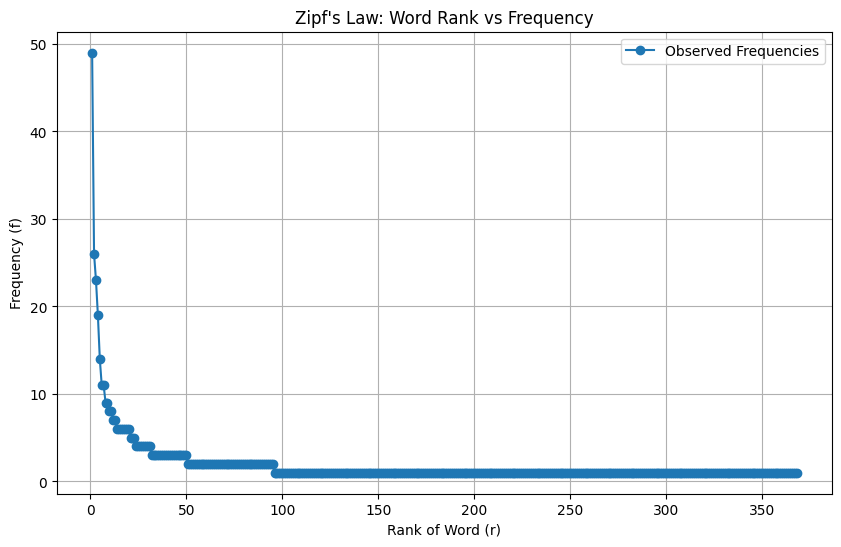


=== Heap's Law ===
Calculated K: 18.66
Calculated Beta: 0.15


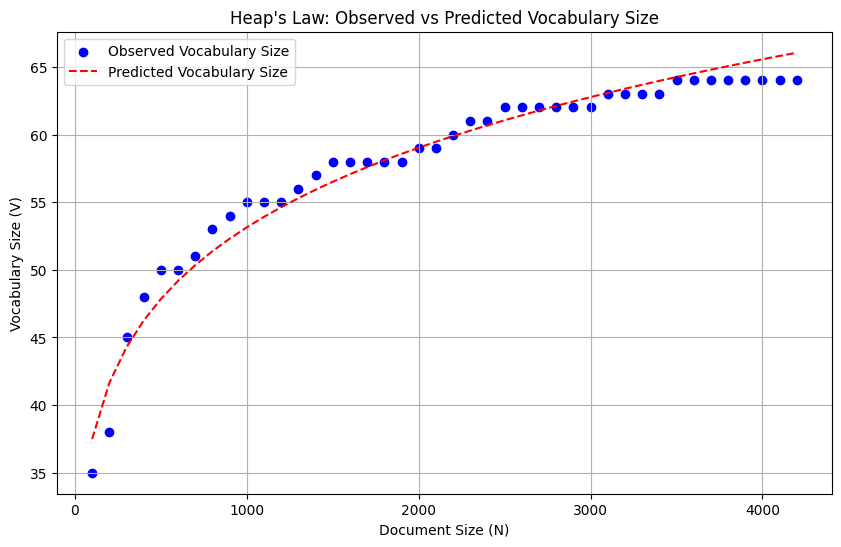

In [4]:
# Run the program
if __name__ == "__main__":
    text = '''UNITED NATIONS (AP) _ A senior U.N. environmental official says entire nations could be wiped off the face of the Earth by rising sea levels if the global warming trend is not reversed by the year 2000.

Coastal flooding and crop failures would create an exodus of ''eco- refugees,’ ' threatening political chaos, said Noel Brown, director of the New York office of the U.N. Environment Program, or UNEP.

He said governments have a 10-year window of opportunity to solve the greenhouse effect before it goes beyond human control.

As the warming melts polar icecaps, ocean levels will rise by up to three feet, enough to cover the Maldives and other flat island nations, Brown told The Associated Press in an interview on Wednesday.

Coastal regions will be inundated; one-sixth of Bangladesh could be flooded, displacing a fourth of its 90 million people. A fifth of Egypt’s arable land in the Nile Delta would be flooded, cutting off its food supply, according to a joint UNEP and U.S. Environmental Protection Agency study.

''Ecological refugees will become a major concern, and what’s worse is you may find that people can move to drier ground, but the soils and the natural resources may not support life. Africa doesn’t have to worry about land, but would you want to live in the Sahara?’' he said.

UNEP estimates it would cost the United States at least $100 billion to protect its east coast alone.


Shifting climate patterns would bring back 1930s Dust Bowl conditions to Canadian and U.S. wheatlands, while the Soviet Union could reap bumper crops if it adapts its agriculture in time, according to a study by UNEP and the International Institute for Applied Systems Analysis.

Excess carbon dioxide is pouring into the atmosphere because of humanity’s use of fossil fuels and burning of rain forests, the study says. The atmosphere is retaining more heat than it radiates, much like a greenhouse.

The most conservative scientific estimate that the Earth’s temperature will rise 1 to 7 degrees in the next 30 years, said Brown.

The difference may seem slight, he said, but the planet is only 9 degrees warmer now than during the 8,000-year Ice Age that ended 10,000 years ago.

Brown said if the warming trend continues, ''the question is will we be able to reverse the process in time? We say that within the next 10 years, given the present loads that the atmosphere has to bear, we have an opportunity to start the stabilizing process.’'

He said even the most conservative scientists ''already tell us there’s nothing we can do now to stop a ... change’’ of about 3 degrees.

''Anything beyond that, and we have to start thinking about the significant rise of the sea levels ... we can expect more ferocious storms, hurricanes, wind shear, dust erosion.’'

He said there is time to act, but there is no time to waste.

UNEP is working toward forming a scientific plan of action by the end of 1990, and the adoption of a global climate treaty by 1992. In May, delegates from 103 nations met in Nairobi, Kenya - where UNEP is based - and decided to open negotiations on the treaty next year.

Nations will be asked to reduce the use of fossil fuels, cut the emission of carbon dioxide and other greenhouse gases such as methane and fluorocarbons, and preserve the rain forests.

''We have no clear idea about the ecological minimum of green space that the planet needs to function effectively. What we do know is that we are destroying the tropical rain forest at the rate of 50 acres a minute, about one football field per second,’' said Brown.

Each acre of rain forest can store 100 tons of carbon dioxide and reprocess it into oxygen.

Brown suggested that compensating Brazil, Indonesia and Kenya for preserving rain forests may be necessary.

The European Community istalking about a half-cent levy on each kilowatt- hour of fossil fuels to raise $55 million a year to protect the rain forests, and other direct subsidies may be possible, he said.

The treaty could also call for improved energy efficiency, increasing conservation, and for developed nations to transfer technology to Third World nations to help them save energy and cut greenhouse gas emissions, said Brown.'''
    
    
    main(text)


log(V)=log(K)+β⋅log(N)